## 2.Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

###### When should it be used? 
It assumes that the data are missing completely at random(MCAR) and it assumes that data missing should be small...

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
# to get the percentage of null values...
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

In [5]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [6]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [7]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    
    ##It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [8]:
median=df.Age.median()

In [9]:
median

28.0

In [10]:
impute_nan(df,"Age",median)

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64


In [11]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

``fig.add_subplot(111)`` is same as ``fig.add_subplot(1,1,1)``

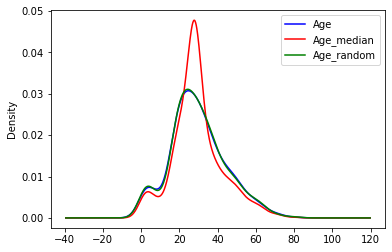

In [13]:
#plot between Age , Age_median, Age_random..


fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='blue')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Age and Age_median curves are almost same

##### Advantages
1. Easy To implement
2. There is less distortion in variance(Age and Age_random are almost same)

##### Disadvantage
1. For Every situation, randomness wont work

## 3.Capturing NAN values with a new feature

It works well if the data are not missing completely at random (MNAR). 

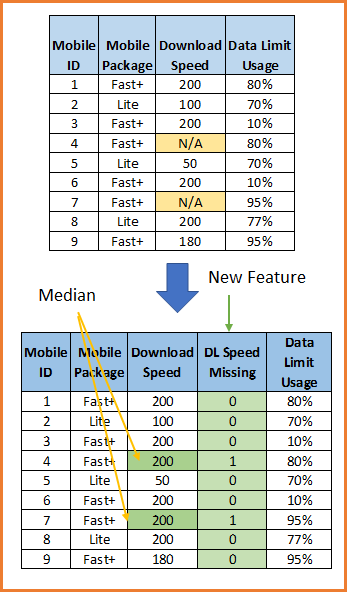

In [1]:


import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [3]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [17]:
df.Age.median()

28.0

In [18]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [19]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


Now feed this whole dataset to trian our model, Although we have an **extra dimension** as column...

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

## 4.End of Distribution imputation
It works well if the data are not missing completely at random. 

###### Procedure: 
    Filling all Na values with outliers...

In [4]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

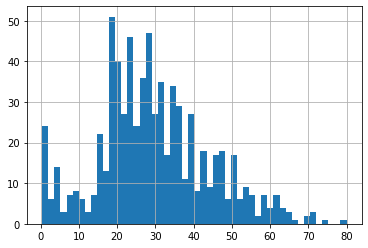

In [12]:
df.Age.hist(bins=50)

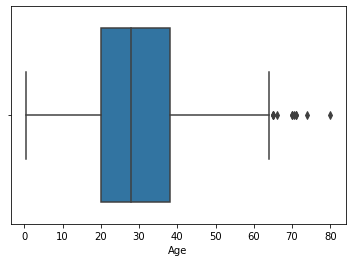

In [16]:
#visualization of outliers..
import seaborn as sns
sns.boxplot('Age',data=df)

Here we have outliers only right side but NO outliers on right side. Hence we take only right 3rd standard deviation...

In [17]:
# extracting data after 3rd standard deviation.
extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [24]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [25]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [26]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


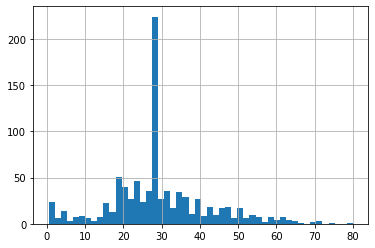

In [27]:
df['Age'].hist(bins=50)

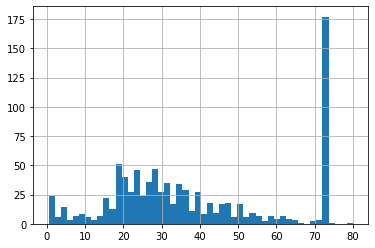

In [28]:
df['Age_end_distribution'].hist(bins=50)

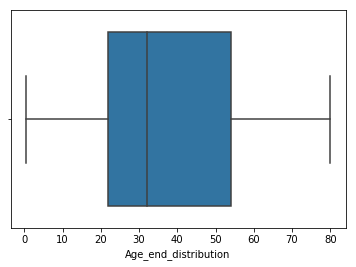

In [59]:
sns.boxplot('Age_end_distribution',data=df)

No outliers are present in this distribution..

## 5.Arbitrary Value Imputation

this technique was derived from kaggle competition..
It consists of replacing NAN by an arbitrary value..

In [1]:
import pandas as pd

df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


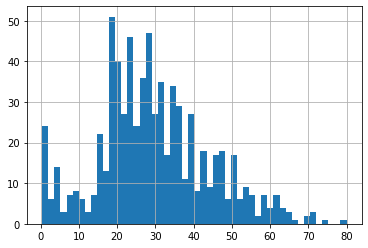

In [2]:
df['Age'].hist(bins=50)

In [3]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

 
### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

## 6) Last Observation Carried Forward (LOCF)
 If data is **time-series** data, then it is one of the most widely used imputation method, Whenever a value is missing, it is replaced with the last observed value. 
*  this method strongly assumes that the value of the outcome remains unchanged by the missing data.

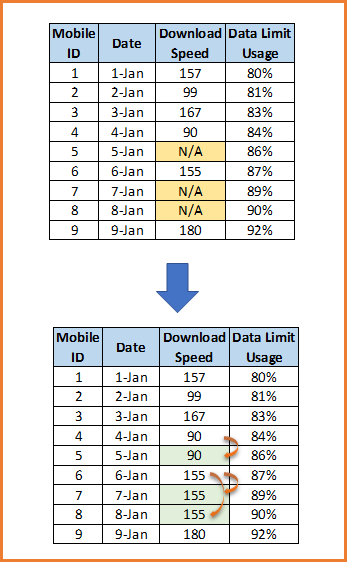

## 7) Next Observation Carried Backward (NOCB)
* it is similar approach like LOCF.Whenever a value is missing, it is replaced with the next observed value. 

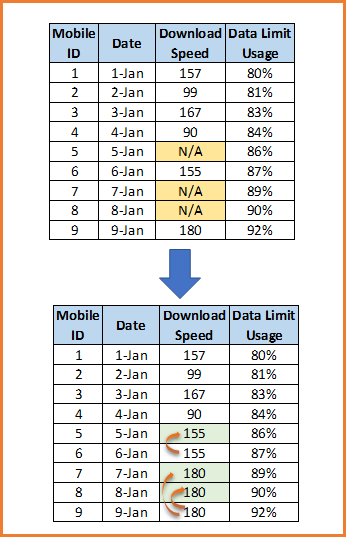

## 8) Linear Interpolation
this is also used for time series data.

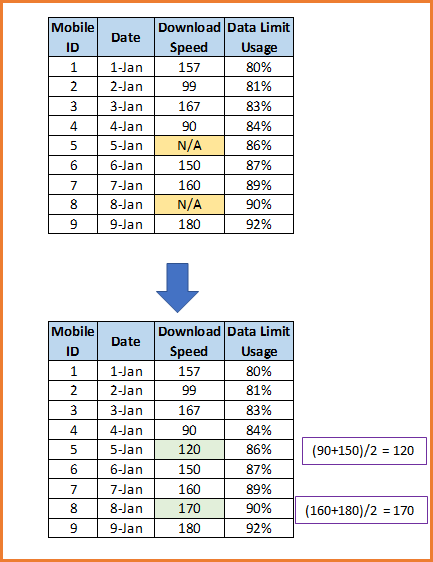

## 9)Regression or Classification imputation
* fill nan values with prediction of nan values by training dataset without nan values.
* Regression algorithms such as Linear Regression , Knn Regression, RandomForest etc used when feature which can be predicted is continuous. Else use Classification Algorithms to predict nan values.
* This method reduces the loss or errors.

#### MICE(Multivariate Imputation by Chained Equations) Algorithm

* Assumption of MICE algorithm is that data is ``Missimg At Ramdom(MAR)``